<a href="https://colab.research.google.com/github/fundaylncii/MachineLearning/blob/main/AdvancedTreeMethods.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
## RANDOM FORESTS:
## Temeli birden çok karar ağacının ürettiği tahminlerin bir araya getirilerek değerlendirilmesine dayanır.
## Bagging ve Random Subspace yönteminin birleşimi ile oluşur.
## Ağaçlar için gözlemler bootstrap rasgele örenek seçim yöntemi ile değişkenler random subspace yöntemi ile seçilir.
## Karar ağacının her bir düğümünde en iyi dallara ayırıcı değişken tüm değişkenler arasından rastgele seçilen daha az sayıdaki değişken arasından seçilir.
## Ağaç oluşturmada veri setinin 2/3 ü kullanılır.
## Her düğüm noktasında rastgele değişken seçimi yapılır.

In [ ]:
## Bagging Yöntemi:

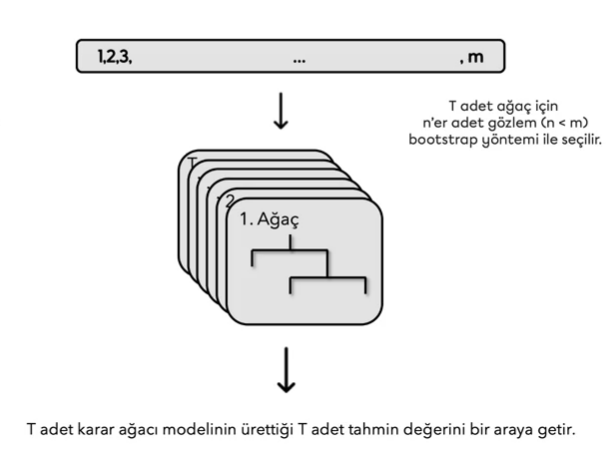

In [2]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 7.0 MB/s eta 0:00:00


In [3]:
import warnings
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.model_selection import GridSearchCV, cross_validate, RandomizedSearchCV, validation_curve

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

In [4]:
pd.set_option("display.max_columns", None)
warnings.simplefilter(action="ignore", category=Warning)

In [5]:
df = pd.read_csv("/content/diabetes.csv")
y = df["Outcome"]
X = df.drop("Outcome", axis=1)

In [6]:
rf_model = RandomForestClassifier(random_state=17)
rf_model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'sqrt',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 17,
 'verbose': 0,
 'warm_start': False}

In [7]:
## Hiperparametre öncesi model başarısı:

cv_results = cross_validate(rf_model, X, y, cv=10, scoring=["accuracy", "f1","roc_auc"])
print(cv_results["test_accuracy"].mean())
print(cv_results["test_f1"].mean())
print(cv_results["test_roc_auc"].mean())

0.753896103896104
0.6190701534636385
0.8233960113960114


In [8]:
## Hiperparametre Optimizasyonu:

rf_params = {"max_depth": [5,8,None],
             "max_features": [3,5,7,"auto"],
             "min_samples_split":[2,5,8,15,20],
             "n_estimators":[100,200,500]}

In [ ]:
## Eğer ön tanımlı değerler hiperparamtre listesinde yer almaz ise optimizasyon sonrasında başarı daha düşük olabilir.
## max_depth = derinlik
## max_features: bölünmelerde göz önünde bulundurulması gereken değişken sayısı
## min_samples_split: bölünme sonunda kalan veri sayısı
## n_estimators: random forrest da kurulacak ağaç sayısı

In [9]:
rf_best_grid = GridSearchCV(rf_model, rf_params, cv=5, n_jobs=-1, verbose=True).fit(X,y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [10]:
rf_best_grid.best_params_

{'max_depth': None,
 'max_features': 5,
 'min_samples_split': 8,
 'n_estimators': 500}

In [11]:
rf_final = rf_model.set_params(**rf_best_grid.best_params_, random_state=17).fit(X,y)

In [12]:
cv_results = cross_validate(rf_final, X, y, cv=10, scoring=["accuracy", "f1","roc_auc"])
print(cv_results["test_accuracy"].mean())
print(cv_results["test_f1"].mean())
print(cv_results["test_roc_auc"].mean())

0.766848940533151
0.6447777811143756
0.8271054131054132


In [13]:
## Feature Importance and Validation Curve:

def plot_importance(model, feature, num=len(X), save=False):
  feature_imp = pd.DataFrame({"Value": model.feature_importances_, "Feature": feature.columns})
  plt.figure(figsize=(10, 10))
  sns.set(font_scale=1)
  sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
  plt.title("Features")
  plt.tight_layout()
  plt.show()
  if save:
    plt.savefig("importances.png")



def val_curve_params(model, X, y, param_name, param_range, scoring="roc_auc", cv=10):
    train_score, test_score = validation_curve(model,
                                               X=X,
                                               y=y,
                                               param_name=param_name,
                                               param_range=param_range,
                                               scoring=scoring,
                                               cv=cv)
    mean_train_score = np.mean(train_score, axis=1)
    mean_test_score = np.mean(test_score, axis=1)

    plt.figure()
    plt.plot(param_range, mean_train_score, label="Training Score", color="b")
    plt.plot(param_range, mean_test_score, label="Validation Score", color="g")
    plt.title(f"Validation Curve for {type(model).__name__}")
    plt.xlabel(f"Number of {param_name}")
    plt.ylabel(f"{scoring}")
    plt.tight_layout()
    plt.legend(loc="best")
    plt.show()

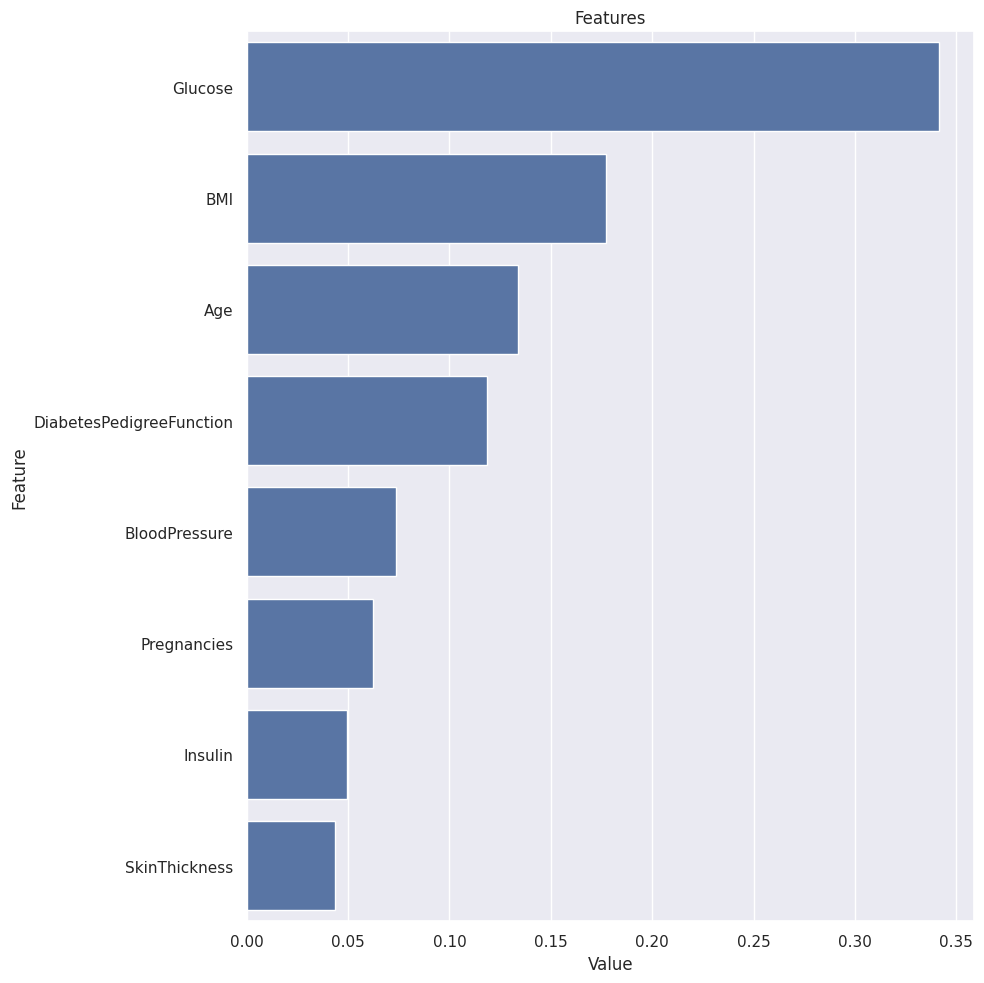

In [14]:
plot_importance(rf_final,X)

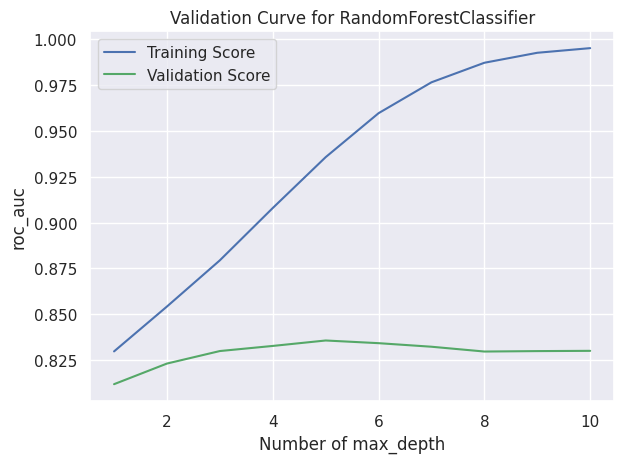

In [ ]:
val_curve_params(rf_final, X, y, "max_depth", range(1,11), scoring="roc_auc")

In [ ]:
## ADABOOST (Adaptive Boosting): Zayıs sınıflandırıcıların bir araya getirilerek güçlü bir sınıflandırıcı oluşturma fikrine dayanır.

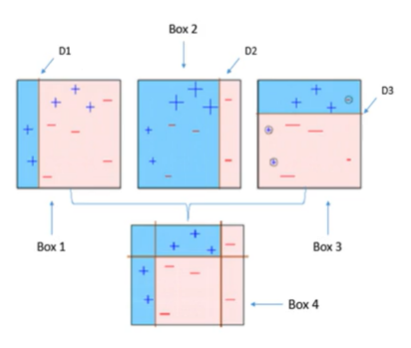

In [ ]:
## GRADIENT BOOSTING MACHINES (GBM):
## Artık optimizasyon mantığına dayanır.
## Hatalar / artıklar üzerine tek bir tahminsel model formunda olan modeller serisi kurulur.

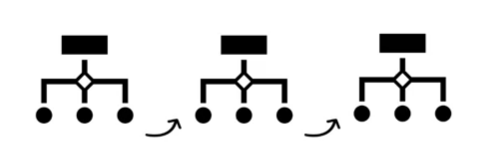

In [ ]:
## Boosting + Gradient Descent
## Seri içerisindeki bir model serideki bir önceki modelin tahmin artıklarının / hatalarının üzerine kurularak oluşturulur.
## GBM differansiyellenebilen herhangi bir kayıp fonksiyonunu optimize edebilen Gradient descent algoritmasını kullanır.
## Tek bir tahminsel model formunda olan modelleri seriis additive şekilde kurulur.


In [ ]:
## ADDITIVE MODELING??

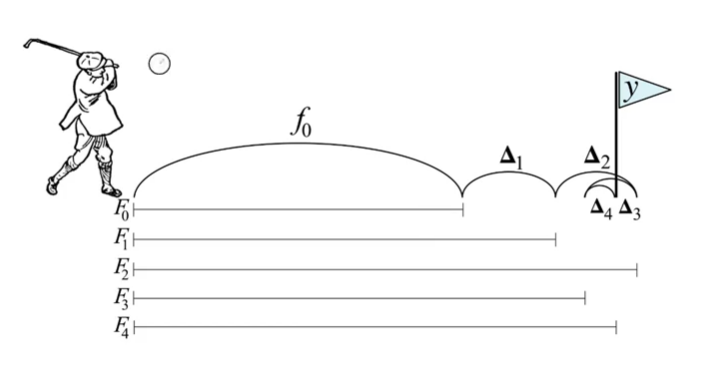

In [15]:
gbm_model = GradientBoostingClassifier(random_state=17)

In [16]:
gbm_model.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'friedman_mse',
 'init': None,
 'learning_rate': 0.1,
 'loss': 'log_loss',
 'max_depth': 3,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_iter_no_change': None,
 'random_state': 17,
 'subsample': 1.0,
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': 0,
 'warm_start': False}

In [17]:
cv_results = cross_validate(gbm_model, X, y, cv=5, scoring=["accuracy", "f1","roc_auc"])
print(cv_results["test_accuracy"].mean())
print(cv_results["test_f1"].mean())
print(cv_results["test_roc_auc"].mean())

0.7591715474068416
0.634235802826363
0.8254867225716283


In [20]:
gbm_params = {"learning_rate": [0.01,0.1],
              "max_depth": [3,8,10],
              "n_estimators": [100,500,1000],
              "subsample": [1, 0.5, 0.7]}

In [ ]:
## subsample : Göz önünde bulundurulacak gözlem oranı

In [22]:
gbm_best_grid = GridSearchCV(gbm_model, gbm_params, cv=2, n_jobs=-1, verbose=True).fit(X,y)

Fitting 2 folds for each of 54 candidates, totalling 108 fits


In [23]:
gbm_best_grid.best_params_

{'learning_rate': 0.01, 'max_depth': 10, 'n_estimators': 500, 'subsample': 0.5}

In [24]:
gbm_final = gbm_model.set_params(**gbm_best_grid.best_params_).fit(X,y)

In [25]:
cv_results = cross_validate(gbm_final, X, y, cv=5, scoring=["accuracy", "f1","roc_auc"])
print(cv_results["test_accuracy"].mean())
print(cv_results["test_f1"].mean())
print(cv_results["test_roc_auc"].mean())

0.7708768355827179
0.6452243122333162
0.8291502445842068


In [ ]:
## EXBoost (Extreme Gradient Boosting)
## GMB'in hız ve tahmin performasını arttırmak üzere optimize edilmiş, ölçeklenebilir ve farklı platformlara entegre edebilir versiyonudur.

In [26]:
xgboost_model = XGBClassifier(random_state=17)

In [28]:
xgboost_model.get_params()

{'objective': 'binary:logistic',
 'base_score': None,
 'booster': None,
 'callbacks': None,
 'colsample_bylevel': None,
 'colsample_bynode': None,
 'colsample_bytree': None,
 'device': None,
 'early_stopping_rounds': None,
 'enable_categorical': False,
 'eval_metric': None,
 'feature_types': None,
 'gamma': None,
 'grow_policy': None,
 'importance_type': None,
 'interaction_constraints': None,
 'learning_rate': None,
 'max_bin': None,
 'max_cat_threshold': None,
 'max_cat_to_onehot': None,
 'max_delta_step': None,
 'max_depth': None,
 'max_leaves': None,
 'min_child_weight': None,
 'missing': nan,
 'monotone_constraints': None,
 'multi_strategy': None,
 'n_estimators': None,
 'n_jobs': None,
 'num_parallel_tree': None,
 'random_state': 17,
 'reg_alpha': None,
 'reg_lambda': None,
 'sampling_method': None,
 'scale_pos_weight': None,
 'subsample': None,
 'tree_method': None,
 'validate_parameters': None,
 'verbosity': None}

In [27]:
cv_results = cross_validate(xgboost_model, X, y, cv=5, scoring=["accuracy", "f1","roc_auc"])
print(cv_results["test_accuracy"].mean())
print(cv_results["test_f1"].mean())
print(cv_results["test_roc_auc"].mean())

0.7409557762498938
0.6180796532975465
0.7934919636617749


In [32]:
xgboost_params = {"learning_rate": [0.1,0.01],
              "max_depth": [5,8],
              "n_estimators": [100,500,1000],
              "colsample_bytree": [0.7,1]}

In [ ]:
## colsample_bytree: değişkenlerden alınacak gözlem sayısı oranı

In [33]:
xgboost_best_grid = GridSearchCV(xgboost_model, xgboost_params, cv=3, n_jobs=-1, verbose=True).fit(X,y)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


In [34]:
xgboost_final = xgboost_model.set_params(**xgboost_best_grid.best_params_).fit(X,y)

In [35]:
cv_results = cross_validate(xgboost_final, X, y, cv=5, scoring=["accuracy", "f1","roc_auc"])
print(cv_results["test_accuracy"].mean())
print(cv_results["test_f1"].mean())
print(cv_results["test_roc_auc"].mean())

0.7565571683218741
0.6309149730138174
0.8201879804332635


In [ ]:
## LightGBM
## XGBoost'un eğitim süesi performansını arttırmaya yönelik geliştirilen bir diğer GBM türüdür.
## level-wise büyüme stratejisi yerine leaf-wise büyüme stratejisi ile daha hızlıdır.

In [36]:
lgbm_model = LGBMClassifier(random_state=17)

In [37]:
lgbm_model.get_params()

{'boosting_type': 'gbdt',
 'class_weight': None,
 'colsample_bytree': 1.0,
 'importance_type': 'split',
 'learning_rate': 0.1,
 'max_depth': -1,
 'min_child_samples': 20,
 'min_child_weight': 0.001,
 'min_split_gain': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'num_leaves': 31,
 'objective': None,
 'random_state': 17,
 'reg_alpha': 0.0,
 'reg_lambda': 0.0,
 'subsample': 1.0,
 'subsample_for_bin': 200000,
 'subsample_freq': 0}

In [ ]:
cv_results = cross_validate(lgbm_model, X, y, cv=5, scoring=["accuracy", "f1","roc_auc"])
print(cv_results["test_accuracy"].mean())
print(cv_results["test_f1"].mean())
print(cv_results["test_roc_auc"].mean())

In [ ]:
## 0.7643578643578645

## 0.6372062920577772

## 0.8147491264849755


In [48]:
lgbm_params = {"learning_rate": [0.01,0.1,0.001],
               "n_estimators": [100,300,500,1000],
               "colsample_bytree": [0.5,0.7,1]}

In [ ]:
lgbm_best_grid = GridSearchCV(lgbm_model,lgbm_params, cv=5, n_jobs=-1, verbose=True).fit(X,y)

In [ ]:
lgbm_final = lgbm_model.set_params(**lgbm_best_grid.best_params_, random_state=17).fit(X,y)

In [ ]:
cv_results = cross_validate(lgbm_final, X, y, cv=5, scoring=["accuracy", "f1","roc_auc"])
print(cv_results["test_accuracy"].mean())
print(cv_results["test_f1"].mean())
print(cv_results["test_roc_auc"].mean())

In [ ]:
## 0.7643578643578645

## 0.6372062920577772

## 0.8147491264849755

In [ ]:
lgbm_model = LGBMClassifier(random_state=17,colsample_bytree=0.9,learning_rate=0.01  )
lgbm_params = {"n_estimators": [200,400,1000,5000,10000]}
lgbm_best_grid = GridSearchCV(lgbm_model,lgbm_params, cv=5, n_jobs=-1, verbose=True).fit(X,y)

In [ ]:
lgbm_final = lgbm_model.set_params(**lgbm_best_grid.best_params_, random_state=17).fit(X,y)
cv_results = cross_validate(lgbm_final, X, y, cv=5, scoring=["accuracy", "f1","roc_auc"])

In [55]:
print(cv_results["test_accuracy"].mean())
print(cv_results["test_f1"].mean())
print(cv_results["test_roc_auc"].mean())

0.7643833290892115
0.6193071162618689
0.8227931516422082


In [ ]:
## CatBoost:
## Kategorik değişkenler ile otomatik olarak mücadele edbilen hızlı, başarılı bir GMB türevidir.

In [56]:
catboost_model = CatBoostClassifier(random_state=17, verbose=False)

In [57]:
cv_results = cross_validate(catboost_model, X, y, cv=5, scoring=["accuracy", "f1","roc_auc"])

In [58]:
print(cv_results["test_accuracy"].mean())
print(cv_results["test_f1"].mean())
print(cv_results["test_roc_auc"].mean())

0.7735251676428148
0.6502723851348231
0.8378923829489867


In [60]:
catboost_params = {"iterations": [200, 500],
                   "learning_rate":[0.01, 0.1],
                   "depth": [3,6]}

In [61]:
catboost_best_grid = GridSearchCV(catboost_model, catboost_params, cv=3, n_jobs=-1, verbose=True).fit(X,y)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


In [62]:
catboost_final = catboost_model.set_params(**catboost_best_grid.best_params_).fit(X,y)

In [63]:
cv_results = cross_validate(catboost_final, X, y, cv=5, scoring=["accuracy", "f1","roc_auc"])

In [64]:
print(cv_results["test_accuracy"].mean())
print(cv_results["test_f1"].mean())
print(cv_results["test_roc_auc"].mean())

0.7630931160342925
0.6169260272167122
0.8368259958071279


In [65]:
## FEATURE IMPORTANCE:

def plot_importance(model, feature, num=len(X), save=False):
  feature_imp = pd.DataFrame({"Value": model.feature_importances_, "Feature": feature.columns})
  plt.figure(figsize=(10, 10))
  sns.set(font_scale=1)
  sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
  plt.title("Features")
  plt.tight_layout()
  plt.show()
  if save:
    plt.savefig("importances.png")

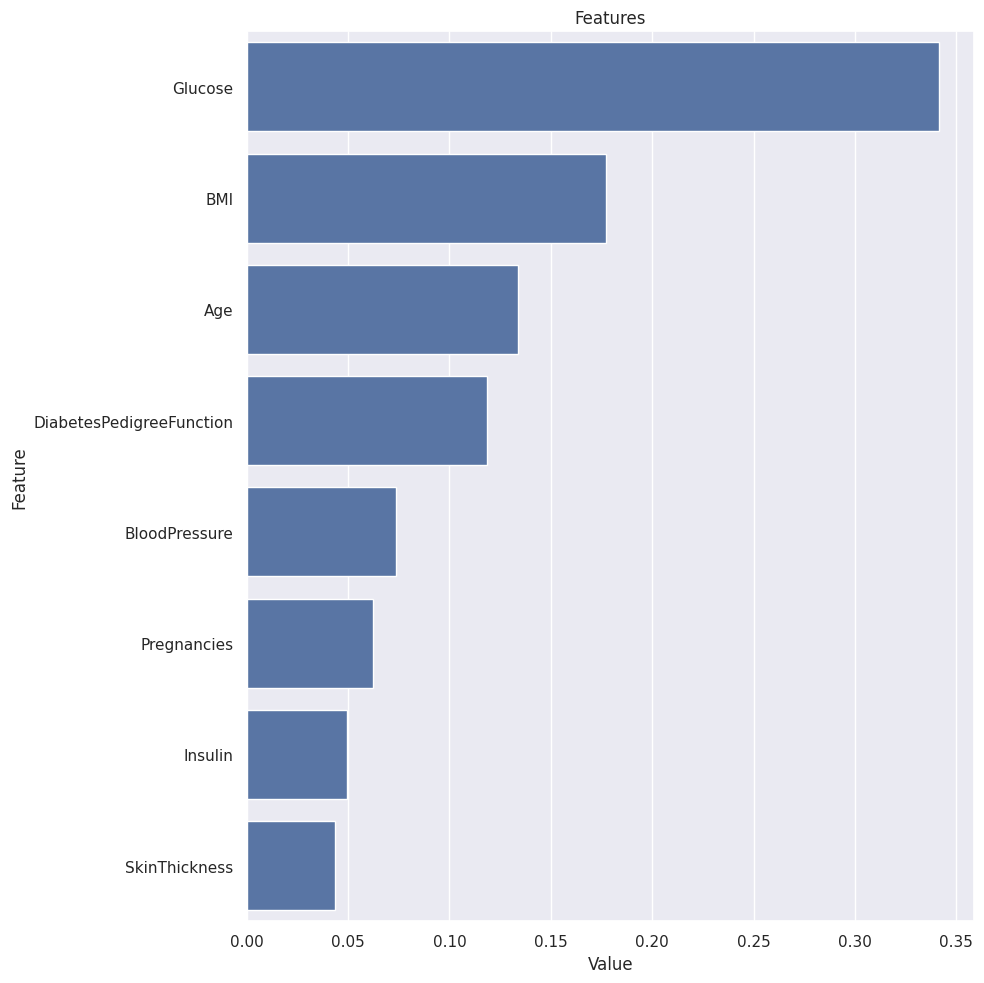

In [66]:
plot_importance(rf_final,X)

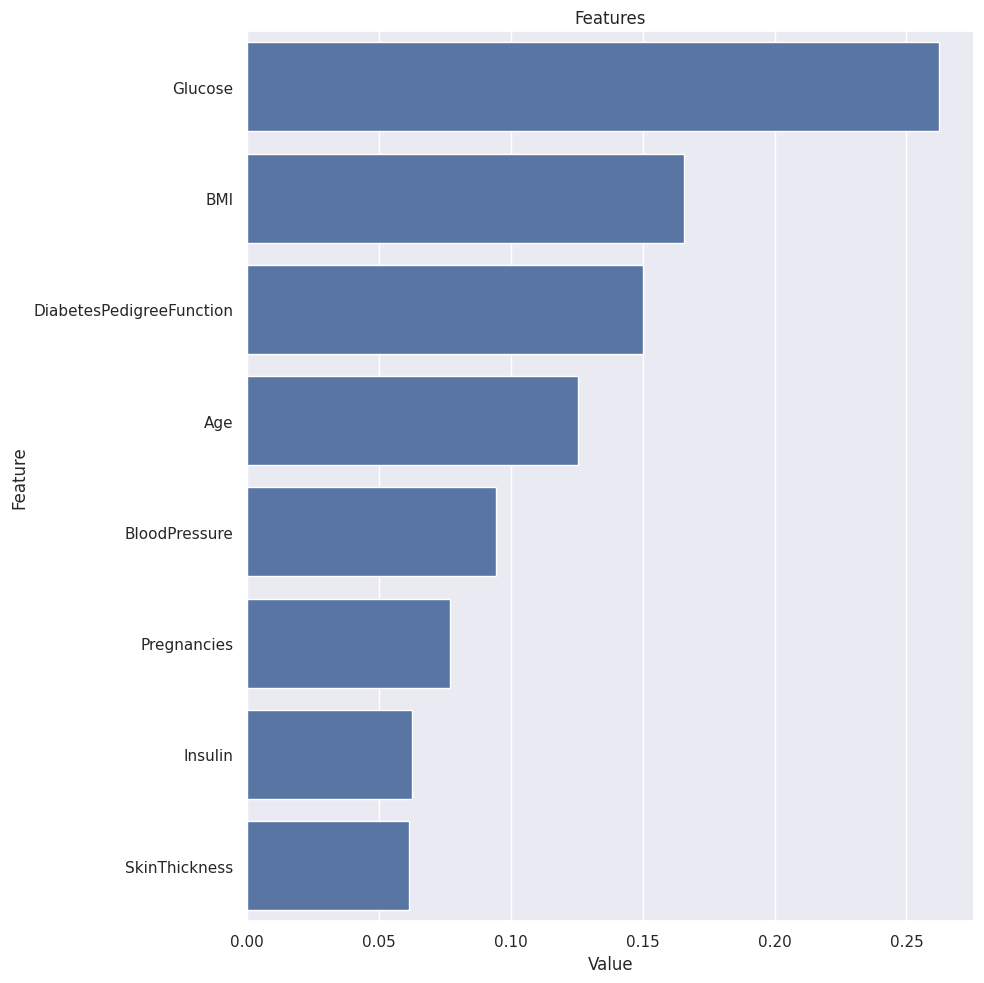

In [68]:
plot_importance(gbm_final,X)

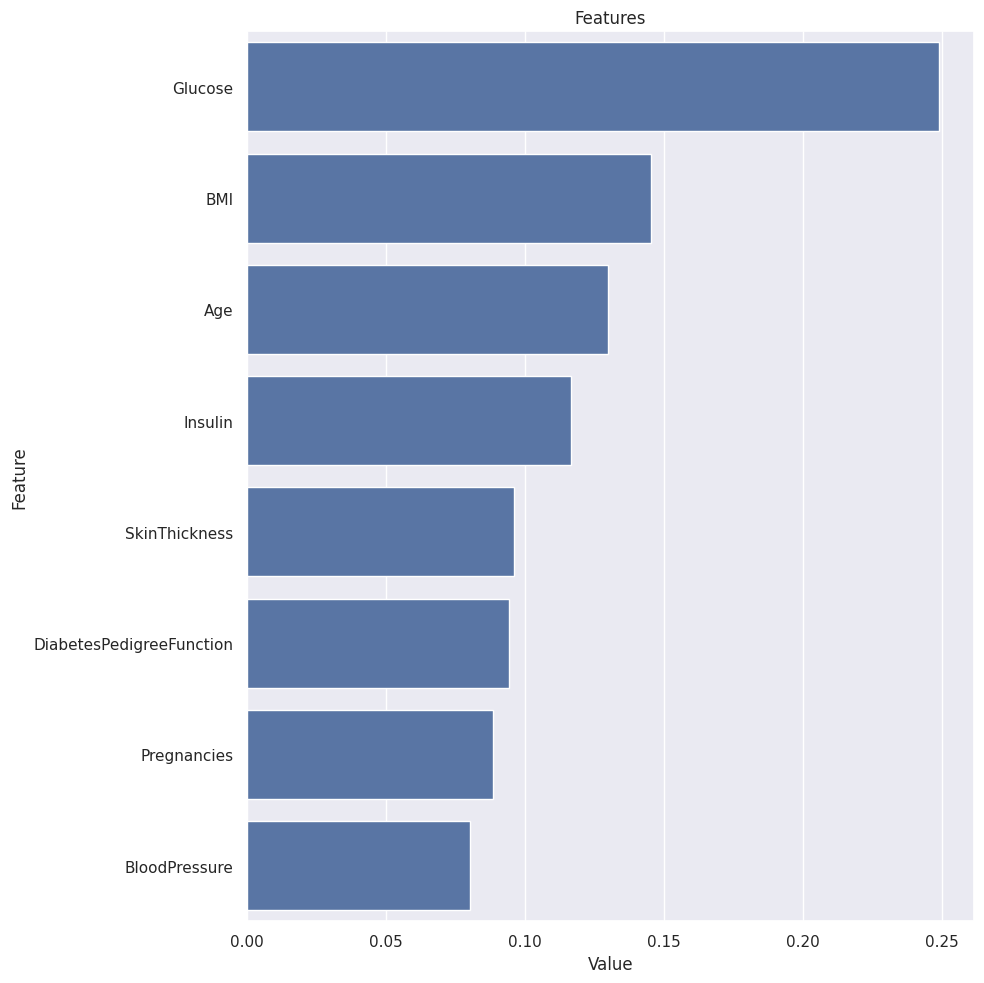

In [69]:
plot_importance(xgboost_final,X)

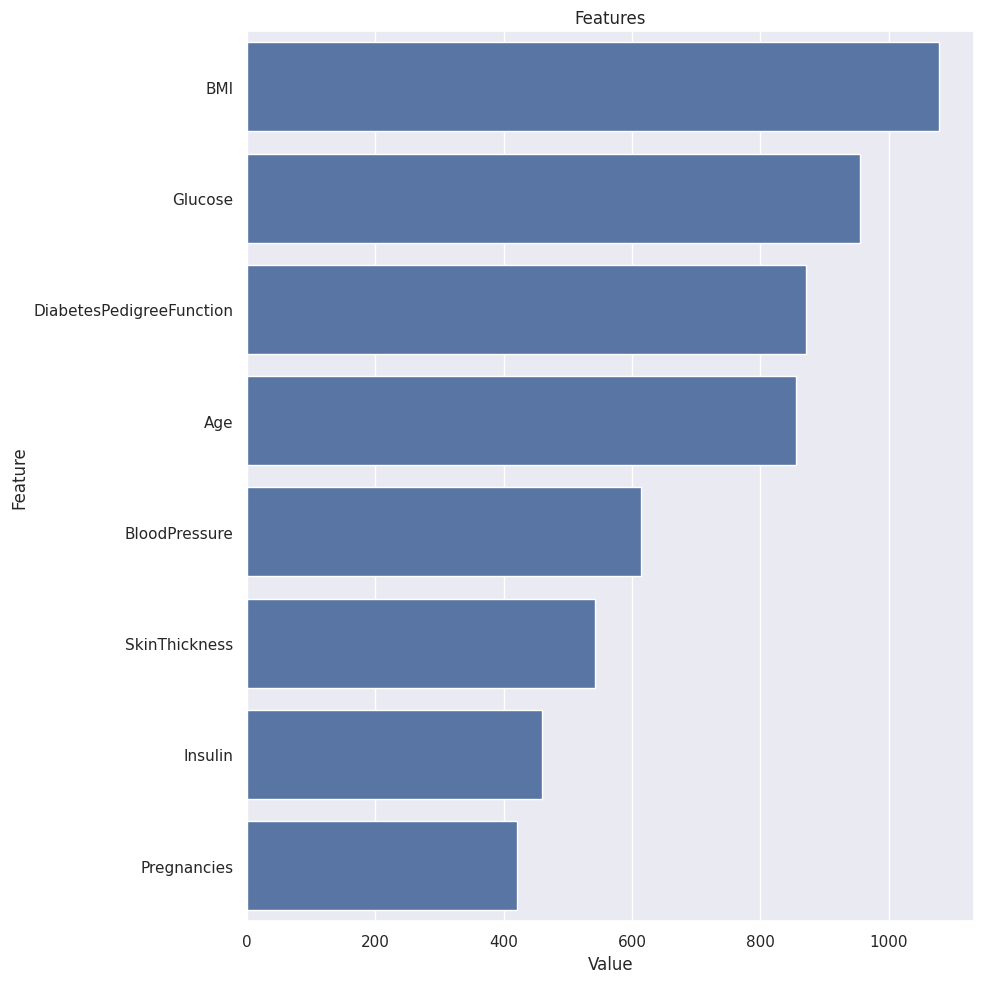

In [70]:
plot_importance(lgbm_final,X)

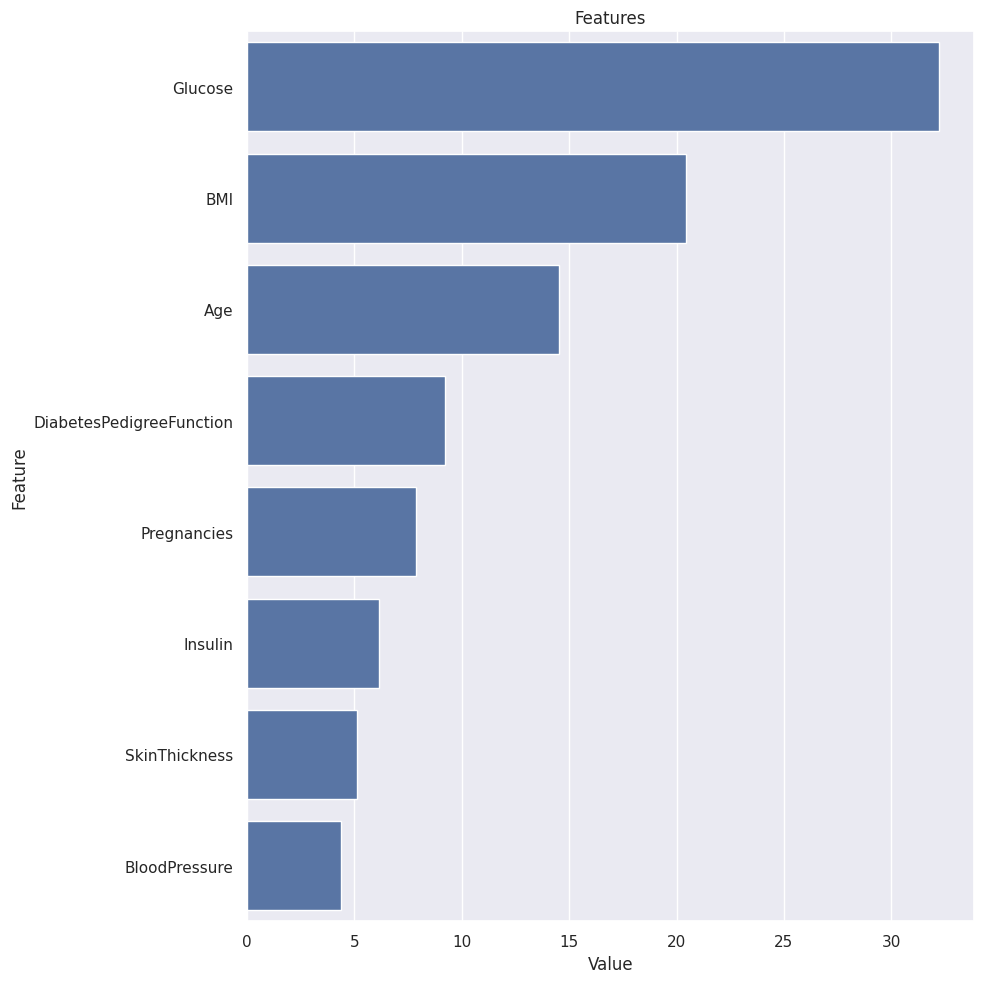

In [71]:
plot_importance(catboost_final,X)

In [ ]:
## Random Search CV:

## Gridsearch :verilen bir setin olası tüm kombinasyonlarını tek tek dener
## Randomsearch :verilecek bir hiperparametre seti içerisinden rasrgele seçimler yapar ve dener

In [79]:
rf_model = RandomForestClassifier(random_state=17)
rf_random_params = {"max_depth": np.random.randint(5,50,10),
                    "max_features":[3,5,7,"auto","sqrt"],
                    "min_samples_split": np.random.randint(2,50,20),
                    "n_estimators": [int(x) for x in np.linspace(start=200, stop=1500, num=10)]}

In [80]:
rf_random = RandomizedSearchCV(estimator=rf_model,
                               param_distributions=rf_random_params,
                               n_iter=100,
                               cv=3,
                               verbose=True,
                               random_state=42,
                               n_jobs=-1)

In [81]:
rf_random.fit(X,y)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=17),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': array([28, 22, 37, 10, 47, 40, 42, 20, 22, 40]),
                                        'max_features': [3, 5, 7, 'auto',
                                                         'sqrt'],
                                        'min_samples_split': array([18, 47,  2, 14, 28,  4, 31,  8,  6, 17, 48,  6, 18, 37, 31, 27, 17,
       23, 37,  4]),
                                        'n_estimators': [200, 344, 488, 633,
                                                         777, 922, 1066, 1211,
                                                         1355, 1500]},
                   random_state=42, verbose=True)

In [82]:
rf_random.best_params_

{'n_estimators': 633,
 'min_samples_split': 8,
 'max_features': 3,
 'max_depth': 10}

In [84]:
rf_random_final = rf_model.set_params(**rf_random.best_params_).fit(X,y)

In [85]:
cv_results = cross_validate(rf_random_final, X, y, cv=5, scoring=["accuracy", "f1","roc_auc"])

In [86]:
print(cv_results["test_accuracy"].mean())
print(cv_results["test_f1"].mean())
print(cv_results["test_roc_auc"].mean())

0.7761055937526526
0.6553723151818287
0.8330964360587003


In [89]:
## Öğrenme Eğrileri İle Model Karmaşıklığı İnceleme:

def val_curve_params(model, X, y, param_name, param_range, scoring="roc_auc", cv=10):
    train_score, test_score = validation_curve(model,
                                               X=X,
                                               y=y,
                                               param_name=param_name,
                                               param_range=param_range,
                                               scoring=scoring,
                                               cv=cv)
    mean_train_score = np.mean(train_score, axis=1)
    mean_test_score = np.mean(test_score, axis=1)

    plt.figure()
    plt.plot(param_range, mean_train_score, label="Training Score", color="b")
    plt.plot(param_range, mean_test_score, label="Validation Score", color="g")
    plt.title(f"Validation Curve for {type(model).__name__}")
    plt.xlabel(f"Number of {param_name}")
    plt.ylabel(f"{scoring}")
    plt.tight_layout()
    plt.legend(loc="best")
    plt.show()

In [88]:
rf_val_value = [["max_depth", [5,8,15,20,30,None]],
                ["max_features", [3,5,7,"auto"]],
                ["min_samples_split", [2,5,8,15,20]],
                ["n_estimators", [10,50,100,200,500]]]

In [90]:
rf_model = RandomForestClassifier(random_state=17)

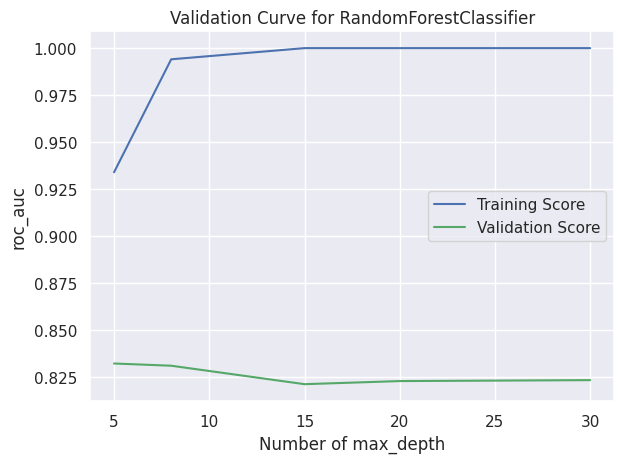

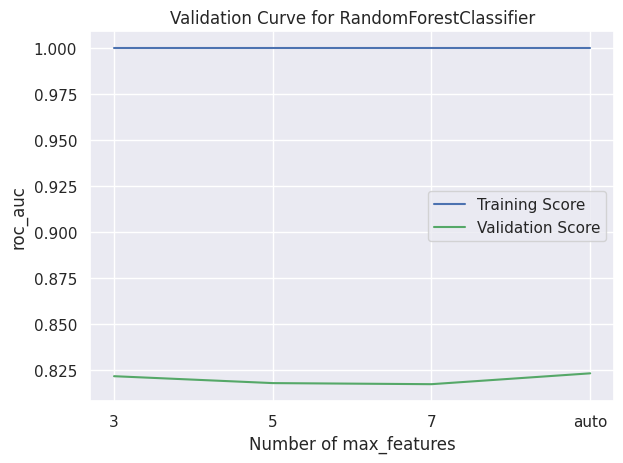

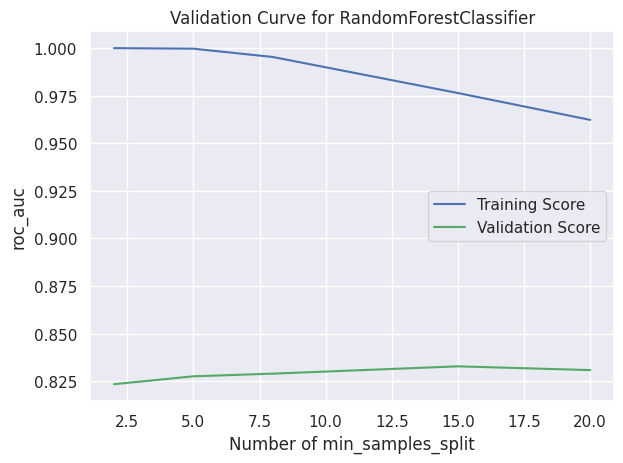

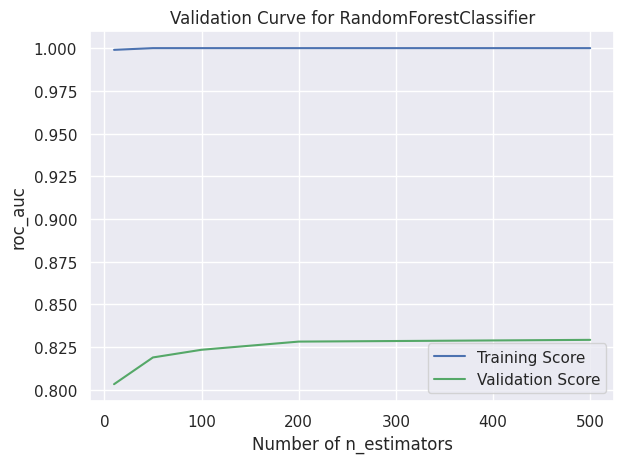

In [91]:
for i in range(len(rf_val_value)):
  val_curve_params(rf_model,X,y,rf_val_value[i][0], rf_val_value[i][1])